In [ ]:
pip install easyocr

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#import easyocr
import imutils

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/DOM')

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/OPENCV/num_4.jpeg')

In [ ]:
img.shape

(680, 1024, 3)

# **Находим прямоугольник знака:**

**накладываем фильтры для упрощения картинки (обнаруживаем края):**

In [ ]:
# переводим в серый цвет
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
# упрощаем изображение
img_filter = cv2.bilateralFilter(gray, 11, 15, 15) # 11 - сколько пикселей будет охвачено, 15 до скольки цветов снизится качество изображения
                                         # 15 - координатное пространство.

In [ ]:
# превращаем изображение в контуры
edges = cv2.Canny(img_filter, 30, 200) # 30 - начальный порог, 200 - конечный порог

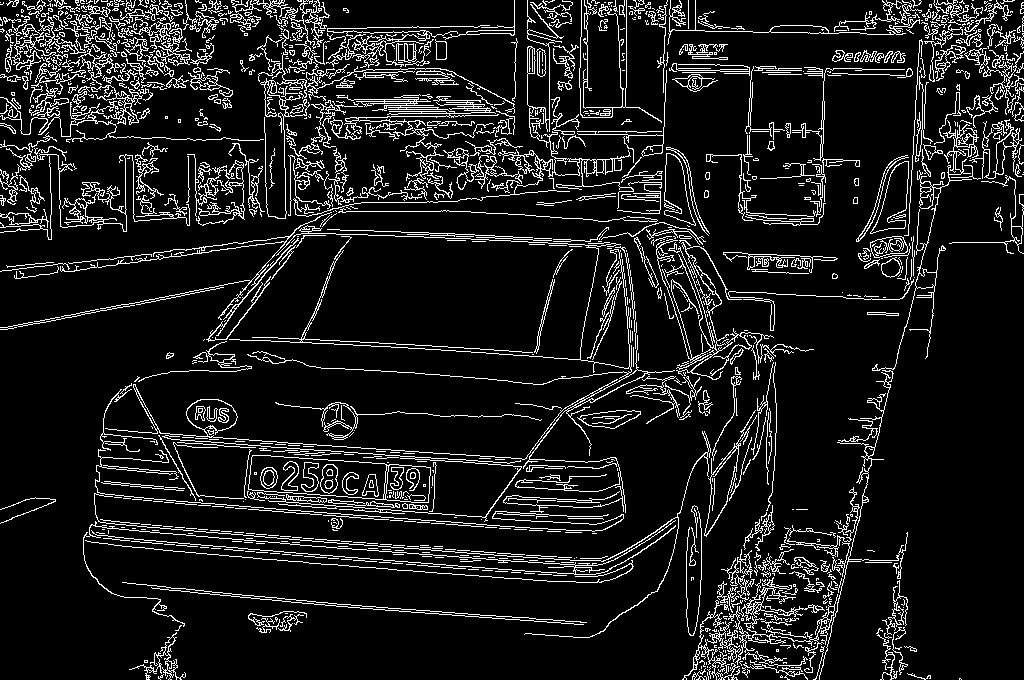

In [ ]:
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

**обнаруживаем контуры (библиотека imutils):**

In [ ]:
# находим контуры
cont = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cv2.RETR_TREE - режим обнаружения контуров
# cv2.CHAIN_APPROX_SIMPLE - метод обнаружения контуров

In [ ]:
# считываем все найденные контуры
cont = imutils.grab_contours(cont)

In [ ]:
# сортировка контуров
cont = sorted(cont, key=cv2.contourArea, reverse=True)[:8]
# key=cv2.contourArea - метод сортировки (говорим о том, что ищем квадратные контуры)
# reverse=True - для того чтобы интересующие нас контуры находились вверху
# [:8] - находим первые 8 контуров

In [ ]:
# перебираем контуры
pos = []
for i in cont:
  approx = cv2.approxPolyDP(i, 10, True)
  if len(approx) == 4:
    pos.append(approx)
    break
# 10 - это (пояснение: 1 - контур близкий к кругу, 10 - ближе к квадрату)
# True - значит контур должен быть замкнут
# len(approx) == 4 - добавляем в список контур с 4-мя сторонами

In [ ]:
print(pos)

[array([[[251, 457]],

       [[248, 489]],

       [[428, 502]],

       [[430, 467]]], dtype=int32)]


In [ ]:
mask = np.zeros(gray.shape,np.uint8)
# черная маска в размер изображения

In [ ]:
# создаем контур
new_img = cv2.drawContours(mask, pos, 0, 255, -1)
# 0 - это номер ID
# 255 - цвет
# -1 - это обводка, -1 - значит, что поле заливается цветом

In [ ]:
# побитовая операция
bitwise_img = cv2.bitwise_and(img,img, mask=mask)

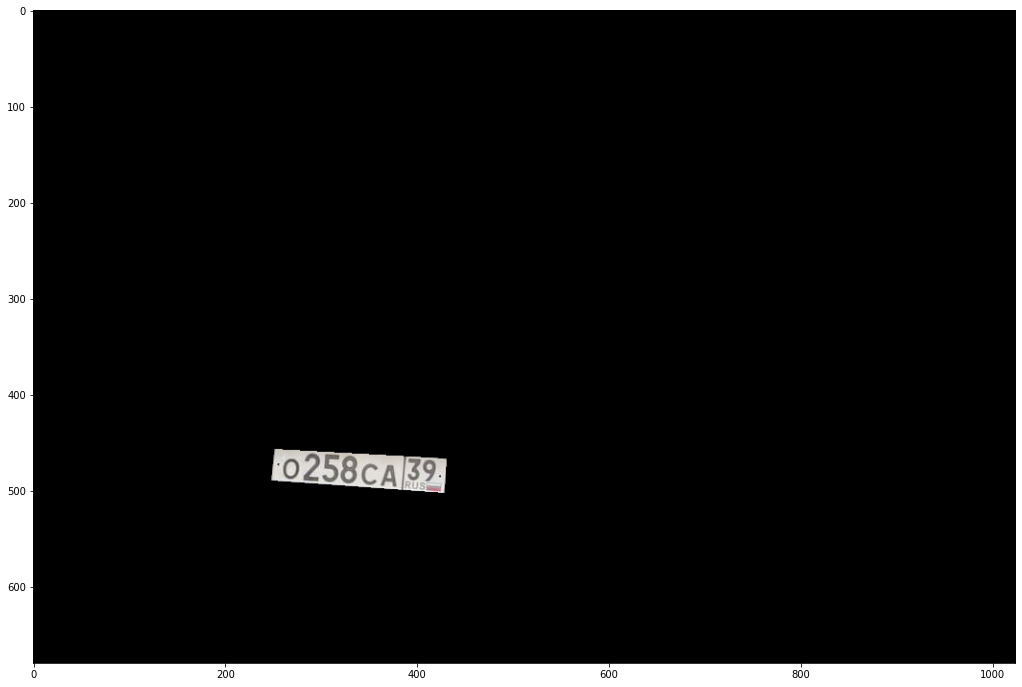

In [ ]:
plt.figure(figsize=(20, 12))
plt.imshow(cv2.cvtColor(bitwise_img,cv2.COLOR_BGR2RGB))
plt.show()

# **Распознаем номер знака:**

**Вырезаем знак:**

In [ ]:
x, y = np.where(mask==255) # вырезаем знак из изображения
x1, y1 = np.min(x), np.min(y) # находим верхний левый угол знака
x2, y2 = np.max(x), np.max(y) # находим нижний правый угол знака
crop = gray[x1:x2, y1:y2] # обрезаем изображение

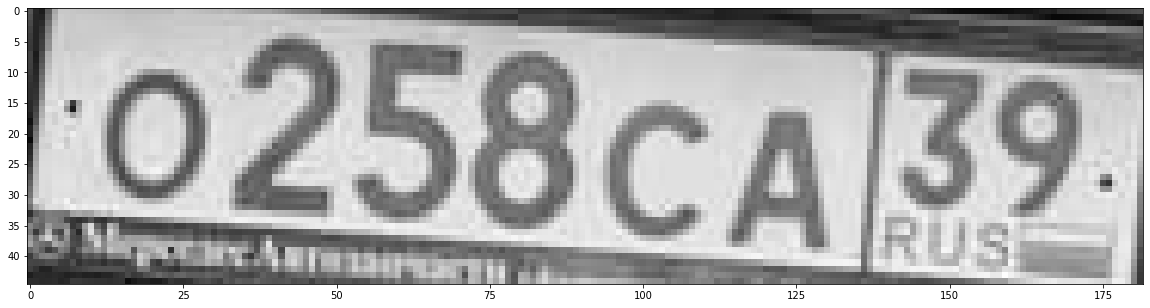

In [ ]:
plt.figure(figsize=(20, 12))
plt.imshow(cv2.cvtColor(crop,cv2.COLOR_BGR2RGB))
plt.show()

**Читаем номер (используем библиотеку easyocr):**

In [ ]:
text = easyocr.Reader(['en'])

In [ ]:
text = text.readtext(crop)



---



**отступление, вытаскиваем текст из кортежа:**

In [ ]:
res = text[0][1]
res = res.replace("'","").replace(".","")
res

'0258CA19'

In [ ]:
lst =[]
for i in list(res):
  if i.isdigit() is True:
    lst.append(int(i))
  else:
    lst.append(i)
lst


[0, 2, 5, 8, 'C', 'A', 1, 9]



---



In [ ]:
final_image = cv2.putText(img,res,(x1-200,y2+160),cv2.FONT_HERSHEY_PLAIN,3,(0,0,255),3) # делаем подпись
final_image = cv2.rectangle(img,(x1,x2),(y1,y2),(0,255,0),3) # рисуем квадратик

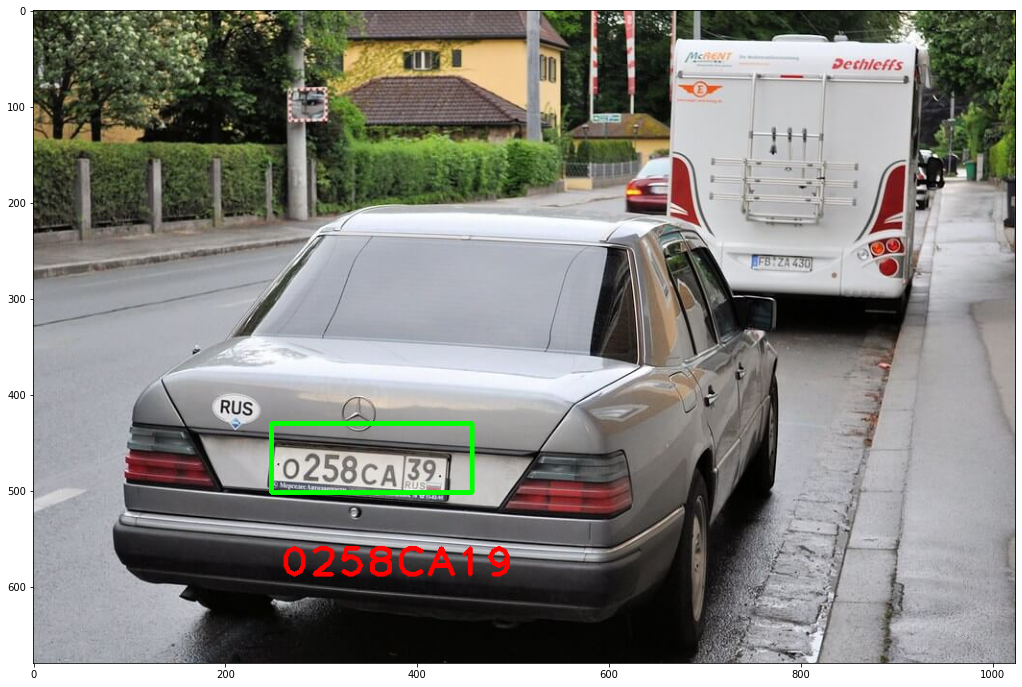

In [ ]:
plt.figure(figsize=(20, 12))
plt.imshow(cv2.cvtColor(final_image,cv2.COLOR_BGR2RGB))
plt.show()